This is the final small assignment version <br>
Student: Eric Ferreira dos Santos <br>
PAC Number: 20215568

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm

In [2]:
df = pd.read_csv('iris_data.csv')

In [3]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


This table summarizes the information from the dataset. It is presented the mean, the standard deviation, minimum value and maximum value and the quartiles. <br> There are missing values in the sepal width and sepal length, but we do not know how these values were collected. In this case, I believe that these values are Missing completely at random (MCR). 

In [4]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,149.000000,149.000000,150.000000
mean,9.407333,3.057718,3.773826,1.199333
std,43.621311,0.437311,1.760543,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,540.000000,4.400000,6.900000,2.500000


In [5]:
print('Number of setosa samples:', len(df[df['Species']=='setosa']))
print('Number of versicolor samples:', len(df[df['Species']=='versicolor']))
print('Number of virginica samples:', len(df[df['Species']=='virginica']))

Number of setosa samples: 50
Number of versicolor samples: 50
Number of virginica samples: 50


In [6]:
#unique species
df['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
#missing data
df[df['Sepal.Width'].isnull()]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
12,4.8,NaN,NaN,0.1,setosa


We can see that the sepal length has an outlier value in the setosa species, which can spoil the analysis. At the same time, is in the setosa species that exists missing values for the width and length.<br>
We would like to predict the missing values (Sepal.Width and Petal.Length in setosa species) using Linear Regression

In [6]:
df_setosa = df[df['Species']=='setosa']

Verifying the linearity between the variables

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Sepal.Length', ylabel='Sepal.Width'>

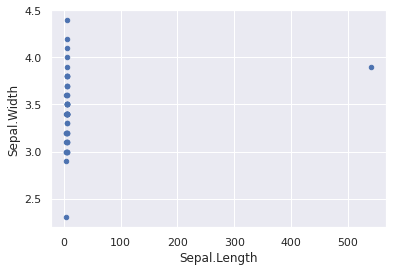

In [9]:
sns.set()
%matplotlib inline

df_setosa.plot.scatter(x='Sepal.Length', y='Sepal.Width')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Petal.Length', ylabel='Sepal.Width'>

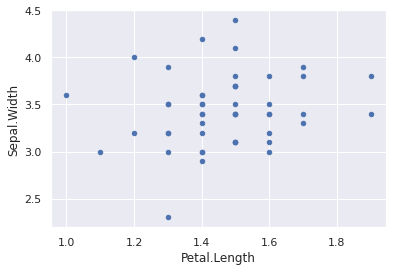

In [12]:
df_setosa.plot.scatter(x='Petal.Length', y='Sepal.Width')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Petal.Width', ylabel='Sepal.Width'>

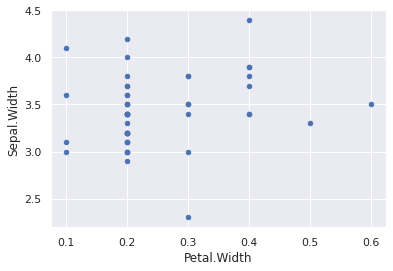

In [13]:
df_setosa.plot.scatter(x='Petal.Width', y='Sepal.Width')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Sepal.Length', ylabel='Petal.Length'>

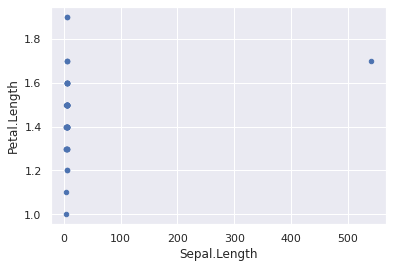

In [15]:
df_setosa.plot.scatter(x='Sepal.Length', y='Petal.Length')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Sepal.Width', ylabel='Petal.Length'>

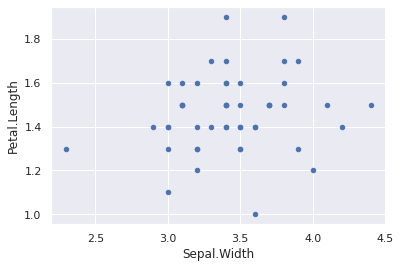

In [16]:
df_setosa.plot.scatter(x='Sepal.Width', y='Petal.Length')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Petal.Width', ylabel='Petal.Length'>

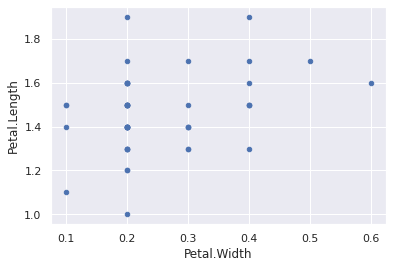

In [17]:
df_setosa.plot.scatter(x='Petal.Width', y='Petal.Length')

In [ ]:
formula_str="prestige~education+income+women"

In [8]:
#outlier data
df[df['Sepal.Length']==540]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5,540.0,3.9,1.7,0.4,setosa


In [52]:
df.loc[df['Sepal.Length']==540,'Sepal.Length'] = 4.8

In [53]:
df.at[5,'Petal.Width'] = 2.5

In [54]:
df.drop([12])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Next, the boxplot shows how the botanists can see the univariate statistics for each class, but we can improve this analysis when looking to each class separately.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116a111d0>,
      dtype=object)

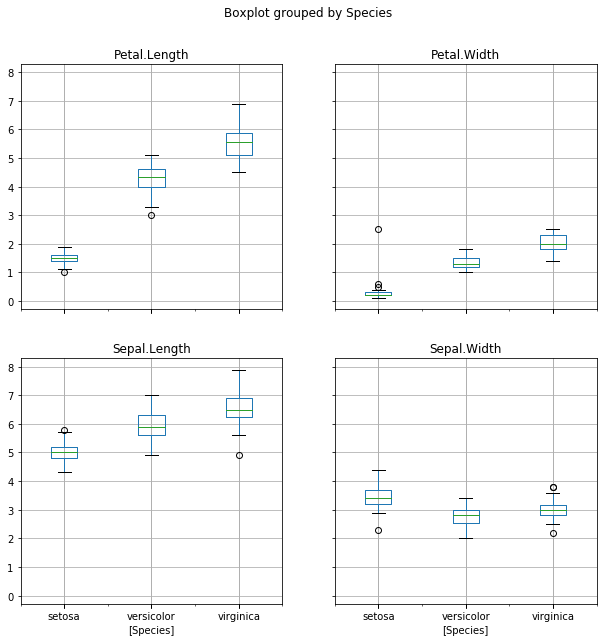

In [55]:
df.boxplot(by='Species',figsize=(10,10))

In [58]:
df_setosa = df[df['Species']=='setosa']
df_versicolor = df[df['Species']=='versicolor']
df_virginica = df[df['Species']=='virginica']

Using the Spearman correlation for each class to get the most correlated variables and using the univariate statistic, we can create a simple algorithm to classify the species.<br>
For example, to classify a flower as a setosa, we can look to the sepal length and sepal width. If the values are close to 4.99 and 3.43, respectively, the flower can be classified as setosa.

In [59]:
df_setosa.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,0.704877,0.218626,0.001116
Sepal.Width,0.704877,1.000000,0.171827,0.222744
Petal.Length,0.218626,0.171827,1.000000,0.276406
Petal.Width,0.001116,0.222744,0.276406,1.000000


In [63]:
df_setosa.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,50.000000,49.000000,49.000000,50.000000
mean,4.994000,3.436735,1.463265,0.288000
std,0.348999,0.377874,0.175231,0.335419
min,4.300000,2.300000,1.000000,0.100000
25%,4.800000,3.200000,1.400000,0.200000
50%,5.000000,3.400000,1.500000,0.200000
75%,5.175000,3.700000,1.600000,0.300000
max,5.800000,4.400000,1.900000,2.500000


For versicolor, we can look to the sepal length, petal width and petal length. If the values are close to 5.93, 1.32 and 4.26, respectively, the flower can be classified as versicolor.

In [60]:
df_versicolor.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,0.525911,0.754049,0.546461
Sepal.Width,0.525911,1.000000,0.560522,0.663999
Petal.Length,0.754049,0.560522,1.000000,0.786668
Petal.Width,0.546461,0.663999,0.786668,1.000000


In [64]:
df_versicolor.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


For virginica, we can look to the sepal length and petal length. If the values are close to 6.58 and 5.52, respectively, the flower can be classified as virginica.

In [62]:
df_virginica.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,0.457228,0.864225,0.281108
Sepal.Width,0.457228,1.000000,0.401045,0.537728
Petal.Length,0.864225,0.401045,1.000000,0.322108
Petal.Width,0.281108,0.537728,0.322108,1.000000


In [65]:
df_virginica.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000
